In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, max_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

   COLI_FEC  E_COLI  DBO_TOT  DQO_TOT    N_TOT     SDT  pH_CAMPO   OD_%  \
0     24196   24196     4.11  27.8784  33.7438  433.28      7.97   85.8   
1     24196    3654     6.65  16.1600   8.3008  306.56      8.02   89.8   
2       663     109     2.33  25.4700  14.6639  748.80      8.27  127.6   
3     24196     860    11.42  32.8000  12.6635  581.76      7.97   85.5   
4     24196     480     3.34  30.0960  18.1750  651.52      8.14   90.5   

   TEMP_AMB  TEMP_AGUA  
0      26.7       24.3  
1      34.6       25.8  
2      37.4       33.1  
3      33.0       29.0  
4      34.8       29.9  
   COLI_FEC    E_COLI   DBO_TOT   DQO_TOT     N_TOT       SDT  pH_CAMPO  \
0  0.001000  0.001000  0.004121  0.016188  0.427296  0.007669  0.477143   
1  0.001000  0.000151  0.009083  0.005578  0.105022  0.005196  0.491429   
2  0.000027  0.000004  0.000645  0.014008  0.185620  0.013827  0.562857   
3  0.001000  0.000036  0.018400  0.020645  0.160282  0.010567  0.477143   
4  0.001000  0.000020  0

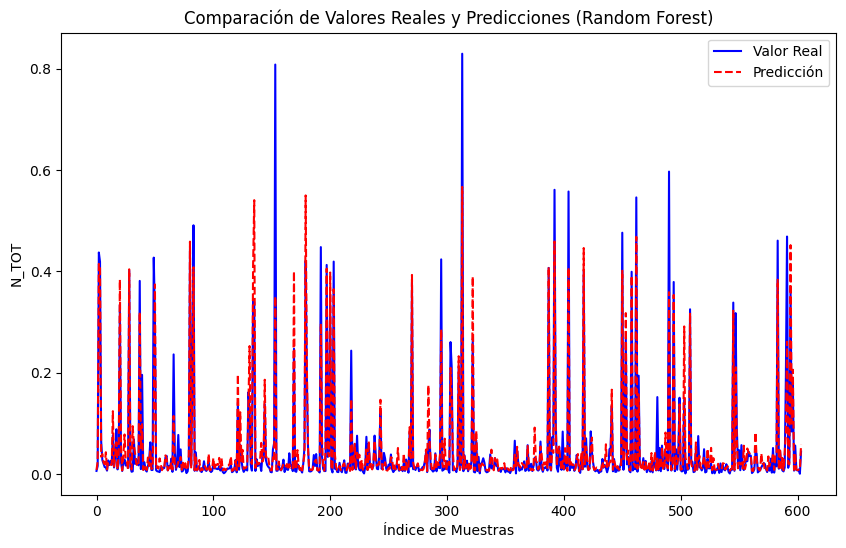

In [3]:
# Ruta del archivo Excel
ruta_archivo = "C://Users//Alienware X15//Desktop//tesis//BDlimpio.xlsx"
#df = pd.read_excel(ruta_archivo,sheet_name="Valores")

# Leer el archivo Excel y seleccionar solo las columnas "A", "C", y "E"
df = pd.read_excel(ruta_archivo,usecols=['E_COLI', 'TEMP_AMB', 'TEMP_AGUA', 'SDT', 'OD_%', 'pH_CAMPO', 'DBO_TOT', 'COLI_FEC', 'DQO_TOT','N_TOT'])

# dMostrar las primeras filas del DataFrame
print(df.head())
# Inicializar el escalador Min-Max
scaler = MinMaxScaler()

# Crear una copia del DataFrame para aplicar la normalización
df_normalizado = df.copy()

# Normalizar las columnas específicas del DataFrame
df_normalizado['OD_%'] = scaler.fit_transform(df_normalizado[['OD_%']])
df_normalizado['SDT'] = scaler.fit_transform(df_normalizado[['SDT']])
df_normalizado['TEMP_AGUA'] = scaler.fit_transform(df_normalizado[['TEMP_AGUA']])
df_normalizado['TEMP_AMB'] = scaler.fit_transform(df_normalizado[['TEMP_AMB']])
df_normalizado['DQO_TOT'] = scaler.fit_transform(df_normalizado[['DQO_TOT']])
df_normalizado['E_COLI'] = scaler.fit_transform(df_normalizado[['E_COLI']])
df_normalizado['N_TOT'] = scaler.fit_transform(df_normalizado[['N_TOT']])
df_normalizado['DBO_TOT'] = scaler.fit_transform(df_normalizado[['DBO_TOT']])
df_normalizado['COLI_FEC'] = scaler.fit_transform(df_normalizado[['COLI_FEC']])
df_normalizado['pH_CAMPO'] = scaler.fit_transform(df_normalizado[['pH_CAMPO']])
df_normalizado['N_TOT'] = scaler.fit_transform(df_normalizado[['N_TOT']])

# Guardar el DataFrame normalizado en un archivo Excel
#df_normalizado.to_excel('df_normalizado.xlsx', index=False)

# Mostrar las primeras filas del DataFrame normalizado
print(df_normalizado.head())
# Asignar las variables de entrada (X) y la variable de salida (y)
X = df_normalizado.drop(columns=['N_TOT'])  # Todas las columnas excepto 'P_TOT'
y = df_normalizado['N_TOT']  # La columna 'P_TOT' como variable de salida

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Asegurarse de que las etiquetas sean arrays unidimensionales
y_train = y_train.values
y_test = y_test.values

# Verificar las formas
print("X_train_scaled shape:", X_train.shape)
print("X_test_scaled shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Definir el modelo Random Forest ajustando hiperparámetros
rf = RandomForestRegressor(n_estimators=640, 
                           max_depth=13, 
                           min_samples_split=3, 
                           min_samples_leaf=1, 
                           max_features='log2', 
                           random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Realizar predicciones
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Evaluar el modelo (usando el error cuadrático medio)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'Error Cuadrático Medio en Entrenamiento: {mse_train}')
print(f'Error Cuadrático Medio en Prueba: {mse_test}')

# Calcular el error absoluto máximo en el conjunto de entrenamiento y prueba
max_error_train = max_error(y_train, y_pred_train)
max_error_test = max_error(y_test, y_pred_test)

print(f'Error Absoluto Máximo en Entrenamiento: {max_error_train}')
print(f'Error Absoluto Máximo en Prueba: {max_error_test}')

# Visualización de las predicciones versus los valores verdaderos
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valor Real', color='blue')
plt.plot(y_pred_test, label='Predicción', color='red', linestyle='--')
plt.legend()
plt.xlabel('Índice de Muestras')
plt.ylabel('N_TOT')
plt.title('Comparación de Valores Reales y Predicciones (Random Forest)')
plt.show()
